## Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_ 

But, if pressed, how would you **prove** it? 

![Equator](equatorsign.png)

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

## Hints and Considerations

* You may want to start this assignment by refreshing yourself on 4th grade geography, in particular, the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm). 

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* Though we've never worked with the [citipy Python library](https://pypi.python.org/pypi/citipy), push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

## Copyright

Coding Boot Camp (C) 2016. All Rights Reserved.

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
from random import uniform
from math import* 
from citipy import citipy
from config import api_key
import geopy

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [3]:
query_url = f"{url}appid={api_key}&units={units}&q="

In [12]:
#function rand_coords takes an int and returns a dictionary of that many unique cities
def rand_coords(num_cities):
    lats = []
    longs = []
    cities= [] 
    countries = []
    for i in range(num_cities): 
        lat, lon = uniform(-90,90),uniform(-180,180)
        lats.append(lat)
        longs.append(lon)
    
        city = citipy.nearest_city(lat, lon)
    
        countries.append(city.country_code)
        cities.append(city.city_name)

    return ({"City": cities, 
             "Country": countries, 
             "Random Lat": lats, 
             "Random Long": longs})

In [13]:
num_cities = 20
cities = rand_coords(num_cities)
#Checking if all are unique

#while len(set(cities)) != num_cities: 
##    cities= list(set(cities))
#    cities.append(rand_coords(abs(num_cities - len(cities))))
#    print("Duplicate")


In [30]:
num_cities = 20
cities = rand_coords(num_cities)
#Checking if all are unique

#while len(set(cities)) != num_cities: 
##    cities= list(set(cities))
#    cities.append(rand_coords(abs(num_cities - len(cities))))
#    print("Duplicate")


cities
# list for response results
name = []
lon= []
lat= []
temperature = []
humidity= []
cloudiness = []
wind_speed = []
pressure = []

# loop through cities, make API request, and append desired results
for city in cities["City"]:
    try:
        city = city.replace(" ","+")
        print(f"Retrieving data for query: {city}")
        #print(query_url + city)
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        cloudiness.append(response["clouds"]['all'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        del(city)
    except:
        del(city)
        print("Not Found by OpenWeatherMaps API")
        

cities['City Proper'] = name
print(cities['City Proper'])
print(cities['City Proper'])
print(len(cities["City"]))
print(len(cities["City"]))
#for count in cities:
 #   x=cities[1][count]
 #   y=cities[2][count]
 #   print(f"{x} is now {y}")
      
print(pd.DataFrame(cities))
print(len(cities["City"]))


Retrieving data for query: taolanaro
Not Found by OpenWeatherMaps API
Retrieving data for query: ribeira+grande
Retrieving data for query: wanning
Retrieving data for query: beringovskiy
Retrieving data for query: cherskiy
Retrieving data for query: busselton
Retrieving data for query: maues
Retrieving data for query: yulara
Retrieving data for query: kaitangata
Retrieving data for query: bethel
Retrieving data for query: quatre+cocos
Retrieving data for query: cherskiy
Retrieving data for query: sao+jose+da+coroa+grande
Retrieving data for query: tubruq
Not Found by OpenWeatherMaps API
Retrieving data for query: luderitz
Retrieving data for query: kiama
Retrieving data for query: illoqqortoormiut
Not Found by OpenWeatherMaps API
Retrieving data for query: fairbanks
Retrieving data for query: faanui
Retrieving data for query: bathsheba


ValueError: arrays must all be same length

In [31]:


 
# --- Build Map ---
from mpl_toolkits.basemap import Basemap

import numpy as np
 
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
x,y = eq_map(lons, lats)
eq_map.plot(x, y, 'ro', markersize=6)
 
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
# Build a scatter plot City Latitude vs. Temperature
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Temp (F)", data=cities, fit_reg=False).set_title('Temp (F) by Latitude')

# Save the figure
plt.savefig("Output/lat_v_temp.png")

# Show plot
plt.show()

In [36]:
lat1 = uniform(-90,90)
long1 = uniform(-180,180)

r_lat1 = radians(lat1)
r_long1 = radians(long1)
print(f"Lat({lat1}): {r_lat1} in radians")print(f"{lat1}: {r_lat1}")
print(f"{long1}: {r_long1}")

Lat(-87.38153796311954): -1.5250955429128554 in radians
-164.97254374407936: -2.8793140637245584


In [ ]:
lat1 = 

In [27]:

weather_data = {"city": cities, "pressure": pressure, "lon": lon}
weather_data = pd.DataFrame(weather_data)
weather_data

,city,lon,pressure
0,London,-0.13,996
1,Paris,2.35,1003
2,Las Vegas,-115.15,1019
3,Stockholm,18.07,999
4,Sydney,151.22,1025
5,Hong Kong,114.16,1024


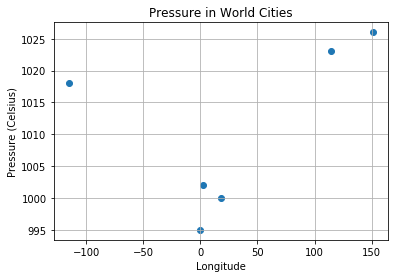

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lon"], weather_data["pressure"], marker="o")

# Incorporate the other graph properties
plt.title("Pressure in World Cities")
plt.ylabel("Pressure (Celsius)")
plt.xlabel("Longitude")
plt.grid(True)

# Save the figure
plt.savefig("PressureInWorldCities.png")

# Show plot
plt.show()

In [12]:
a1 = lat1 in radians
b1 = lon1 in radians
a2 = lat2 in radians
b2 = lon2 in radians
r = 6378


#To convert the decimal degrees to radians use the following perl.

# define an accurate value for PI

pi = atan2(1,1) * 4;

#
# make sure the sign of the angle is correct for the direction
# West an South are negative angles
#

degrees = degrees * -1 if direction =~ /[WwSs]/;
radians = degrees*(pi/180);
To convert degree minutes and seconds to decimal degrees use the following perl formula.

dec_deg = deg + (min + sec/60)/60;
x1 

distance = acos(cosa1)*cos(b1)*cos(a2)*cos(b2) + cos(a1)*sin(b1)*cos(a2)*sin(b2) + sin(a1)*sin(a2)) * r
print()


SyntaxError: invalid syntax (<ipython-input-12-7d7bca6c9026>, line 19)

In [10]:
#from math import *
x,n = 5,1
x *= 2+3**3
class myclass:
   def __init__(s, n):
       s.color = n
   def ok(s,val):
       print (val**2)
o = myclass("blue")
print (o.color)
v = [5,6,o]
x,v[n] = 1+2,3
v[1+1]=v[1:n+2][2*n-1].ok(1)
while x > 3 and x < y:
   x = x+1
   y = 3
   while y < 4:
       y = x
       x = 1
       if y > 3: continue
       else: break
def test(a,b): # func
   a=b
   for x in 1,2,3: y=x; z=x
   return a,b
for x in 1,2,3:
   y=x
   z=x
print (1,2 +3*x+cos(2+sin(3)))
assert 1==1
test(2+3,x/3)
x = {1:2, 3:4+5}
x = 0.2 + 1. + 2E5 + 2.E5 + 2.e+5
y = '234\'234"'
z = "234\"234'"
if x < 10:
   print ("""multi-linestring""")
elif x > 20:
        print(123)
else:
          
    print (234)

blue
1
1 10.460095471966675
123
